#<center>**Άσκηση 1. Επιβλεπόμενη Μάθηση: Ταξινόμηση. Μελέτη datasets του UCI Machine Learning Repository**</center>




# I. Στοιχεία ομάδας 19

1.   Δαμιανός Παππάς       , ΑΜ: 03116608
2.   Χαράλαμπος Ρωσσίδης, ΑΜ: 03116701
3.   Νεκτάριος Ματσάγκος, ΑΜ: 03116709

In [35]:
!pip install --upgrade pip 
!pip install scikit-learn --upgrade 
!pip install numpy --upgrade 
!pip install pandas --upgrade
!pip install --upgrade matplotlib

# II. Βασικές πληροφορίες

###1.Σύντομη παρουσίαση του dataset (τι περιγράφει).

The purpose is to classify a given silhouette as one of four types of vehicle, using a set of features extracted from the silhouette

### *2. Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;*


In [36]:
import pandas as pd
data= pd.read_csv("all.csv",delim_whitespace=True,header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [37]:
import numpy as np
labels = data.iloc[:, 18]
labels

0       van
1       van
2      saab
3       van
4       bus
       ... 
841    saab
842     van
843    saab
844    saab
845     van
Name: 18, Length: 846, dtype: object

- Ο αριθμός δειγμάτων είναι 846, τα χαρακτηριστικά τους είναι 18 και το είδος τους είναι object. Δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά.

### *3. Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;*

- Δεν υπάρχουν επικεφαλίδες ούτε αρίθμηση γραμμών.

In [38]:
features = data.iloc[:, 0:18]
features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195


### *4. Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολώνα βρίσκονται;*

- Οι ετικέτες των κλάσεων είναι 4 και είναι οι εξής: Opel, Saab, Van και Bus. Βρίσκονται στη κολώνα με αριθμό 18.

### *5. Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?*


- Δεν υπάρχει αρίθμηση στηλών και γραμμών, ούτε επικεφαλίδες άρα δεν χρειάζεται να κάνουμε μετατροπές στο αρχείο.



### *6. Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;* 


In [39]:
features.isnull().values.any()

False

- Όχι δεν υπάρχουν απουσιάζουσες τιμές

### *7. Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε την ισορροπία του dataset.*


In [40]:
frequencies = pd.value_counts(labels)
print("Συχνότητα εμφάνισης των δειγμάτων της κάθε κλάσης:")
print(frequencies)

print("Ποσοστό 'bus':", frequencies[0]/len(labels)*100, '%')
print("Ποσοστό 'saab':", frequencies[1]/len(labels)*100, '%')
print("Ποσοστό 'opel':", frequencies[2]/len(labels)*100, '%')
print("Ποσοστό 'van':", frequencies[3]/len(labels)*100, '%')

Συχνότητα εμφάνισης των δειγμάτων της κάθε κλάσης:
bus     218
saab    217
opel    212
van     199
Name: 18, dtype: int64
Ποσοστό 'bus': 25.768321513002363 %
Ποσοστό 'saab': 25.65011820330969 %
Ποσοστό 'opel': 25.059101654846334 %
Ποσοστό 'van': 23.52245862884161 %


### *8. Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.*

In [41]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20)

- Όπως δείξαμε και πιο πάνω δεν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά.

# III. Baseline Classification


###1. Διαχειριστείτε τυχόν απουσιάζουσες τιμές. Εκπαιδεύστε στο train τους classifiers με default τιμές (απλή αρχικοποίηση). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.

In [42]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import timeit

pred={}
micro={}
macro={}
fit_time={}
pred_time={}

dc_uniform = DummyClassifier(strategy="uniform")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")
start = timeit.default_timer()
model=dc_uniform.fit(features_train, labels_train)
stop = timeit.default_timer()
fit_time['uniform']= stop - start
start = timeit.default_timer()
pred["uniform"]= dc_uniform.predict(features_test)
stop = timeit.default_timer()
pred_time['uniform']= stop - start
cnf_matrix = confusion_matrix(labels_test, pred["uniform"])
print("UNIFORM")
print(classification_report(labels_test, pred["uniform"]))
print(cnf_matrix,"\n")



avg=f1_score(labels_test,pred["uniform"], average='micro')
micro["uniform"]=avg
avg=f1_score(labels_test,pred["uniform"], average='macro')
macro["uniform"]=avg

start = timeit.default_timer()
model=dc_most_frequent.fit(features_train, labels_train)
stop = timeit.default_timer()
fit_time['most frequent']= stop - start
start = timeit.default_timer()
pred["most_frequent"]= dc_most_frequent.predict(features_test)
stop = timeit.default_timer()
pred_time['most frequent']= stop - start
cnf_matrix = confusion_matrix(labels_test,pred["most_frequent"])
print("MOST FREQUENT")
print(classification_report(labels_test, pred["most_frequent"]))
print(cnf_matrix,"\n")


avg=f1_score(labels_test,pred["most_frequent"], average='micro')
micro["most_frequent"]=avg
avg=f1_score(labels_test,pred["most_frequent"], average='macro')
macro["most_frequent"]=avg


start = timeit.default_timer()
model=dc_stratified.fit(features_train, labels_train)
stop = timeit.default_timer()
fit_time['stratified']= stop - start
start = timeit.default_timer()
pred["stratified"]= dc_stratified.predict(features_test)
stop = timeit.default_timer()
pred_time['stratified']= stop - start
cnf_matrix = confusion_matrix(labels_test, pred["stratified"])
print("STRATIFIED")
print(classification_report(labels_test, pred["stratified"]))
print(cnf_matrix)
avg=f1_score(labels_test,pred["stratified"], average='micro')
micro["stratified"]=avg
avg=f1_score(labels_test,pred["stratified"], average='macro')
macro["stratified"]=avg


UNIFORM
              precision    recall  f1-score   support

         bus       0.23      0.22      0.22        46
        opel       0.25      0.35      0.29        37
        saab       0.42      0.30      0.35        43
         van       0.25      0.25      0.25        44

    accuracy                           0.28       170
   macro avg       0.29      0.28      0.28       170
weighted avg       0.29      0.28      0.28       170

[[10 18  7 11]
 [10 13  5  9]
 [ 7 10 13 13]
 [16 11  6 11]] 

MOST FREQUENT
              precision    recall  f1-score   support

         bus       0.00      0.00      0.00        46
        opel       0.22      1.00      0.36        37
        saab       0.00      0.00      0.00        43
         van       0.00      0.00      0.00        44

    accuracy                           0.22       170
   macro avg       0.05      0.25      0.09       170
weighted avg       0.05      0.22      0.08       170

[[ 0 46  0  0]
 [ 0 37  0  0]
 [ 0 43  0  0]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
start = timeit.default_timer()
model = gnb.fit(features_train, labels_train)
stop = timeit.default_timer()
fit_time['gnb']= stop - start
start = timeit.default_timer()
pred["gnb"] = gnb.predict(features_test)
stop = timeit.default_timer()
pred_time['gnb']= stop - start
cnf_matrix = confusion_matrix(labels_test,pred["gnb"])
print("Gaussian Naive Bayes")
print(cnf_matrix,"\n")
print(classification_report(labels_test, pred["gnb"]))

avg=f1_score(labels_test,pred["gnb"], average='micro')
micro["gnb"]=avg
avg=f1_score(labels_test,pred["gnb"], average='macro')
macro["gnb"]=avg

Gaussian Naive Bayes
[[ 8 10  2 26]
 [ 1 14 15  7]
 [ 2 12 15 14]
 [ 4  1  1 38]] 

              precision    recall  f1-score   support

         bus       0.53      0.17      0.26        46
        opel       0.38      0.38      0.38        37
        saab       0.45      0.35      0.39        43
         van       0.45      0.86      0.59        44

    accuracy                           0.44       170
   macro avg       0.45      0.44      0.41       170
weighted avg       0.46      0.44      0.41       170



In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
start = timeit.default_timer()
knn.fit(features_train, labels_train)
stop = timeit.default_timer()
fit_time['knn']= stop - start
start = timeit.default_timer()
pred["knn"] = knn.predict(features_test)
stop = timeit.default_timer()
pred_time['knn']= stop - start
cnf_matrix = confusion_matrix(labels_test, pred["knn"])
print("kNN")
print(cnf_matrix, "\n")
print(classification_report(labels_test, pred["knn"]))

avg=f1_score(labels_test,pred["knn"], average='micro')
micro["knn"]=avg
avg=f1_score(labels_test,pred["knn"], average='macro')
macro["knn"]=avg

kNN
[[36  5  5  0]
 [ 3 18 11  5]
 [ 7 13 21  2]
 [ 9  1  2 32]] 

              precision    recall  f1-score   support

         bus       0.65      0.78      0.71        46
        opel       0.49      0.49      0.49        37
        saab       0.54      0.49      0.51        43
         van       0.82      0.73      0.77        44

    accuracy                           0.63       170
   macro avg       0.63      0.62      0.62       170
weighted avg       0.63      0.63      0.63       170



### *2. Για κάθε averaged metric, εκτυπώστε bar plot συγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.*

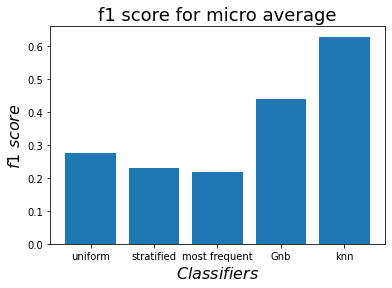

In [45]:
import matplotlib.pyplot as plt

data = {'uniform': micro['uniform'], 'stratified': micro['stratified'], 'most frequent': micro['most_frequent'],'Gnb': micro['gnb'],'knn': micro['knn']}
names = list(data.keys())
values = list(data.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(data)),values,tick_label=names)
plt.savefig('bar.png')
plt.title("f1 score for micro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

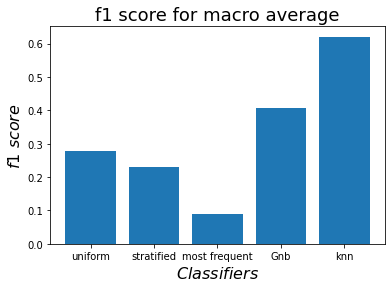

In [46]:
data = {'uniform': macro['uniform'], 'stratified': macro['stratified'], 'most frequent': macro['most_frequent'],'Gnb': macro['gnb'],'knn': macro['knn']}
names = list(data.keys())
values = list(data.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(data)),values,tick_label=names)
plt.savefig('bar.png')
plt.title("f1 score for macro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.show()

### *3.Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης.*


Αυτό που παρατηρούμε είναι ότι ο knn clasifier είναι αυτός με τη περισσότερη ακρίβεια με σημαντική διαφορά από το δεύτερο clasifier που είναι ο Gnb. Αυτή η διαφορά φαίνεται να είναι πιο μεγάλη στο f1_macro_average και το f1_micro_average. Όπως ήταν αναμενόμενο οι 3 dummy clasifiers έχουν μικρό ποσοστό επιτυχίας ενώ ο Gaussian Naive Bayes και ο knn οι οποίοι είναι μαθηματικές μέθοδοι, το ποσοστό επιτυχίας είναι σημαντικά μεγαλύτερο.

# IV. Βελτιστοποίηση ταξινομητών





### *1. Για κάθε ταξινομητή βελτιστοποιήστε την απόδοσή του στο training set μέσω της διαδικασίας προεπεξεργασίας και εύρεσης βέλτιστων υπερπαραμέτρων (δεν έχουν όλοι οι ταξινομητές υπερπαραμέτρους). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.*

In [47]:
from sklearn.model_selection import cross_val_score

myList = list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, features_train, labels_train, cv=10)
    cv_scores.append(scores.mean())

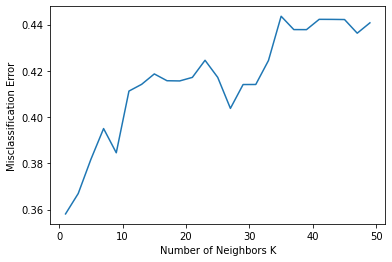

Καλύτερο κ = 1


In [48]:
import matplotlib.pyplot as plt

mean_error = [1 - x for x in cv_scores]
plt.plot(neighbors, mean_error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
optimal_k = neighbors[mean_error.index(min(mean_error))]
print("Καλύτερο κ = %d" % optimal_k)


In [49]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)
start = timeit.default_timer()
knn.fit(features_train, labels_train)
stop = timeit.default_timer()
fit_time['best knn']= stop - start
start = timeit.default_timer()
pred["best knn"] = knn.predict(features_test)
stop = timeit.default_timer()
pred_time['best knn']= stop - start

In [50]:
cnf_matrix = confusion_matrix(labels_test, pred["best knn"])
print(cnf_matrix, "\n")
print(classification_report(labels_test, pred["best knn"]))

avg=f1_score(labels_test,pred["best knn"], average='micro')
micro["best knn"]=avg
avg=f1_score(labels_test,pred["best knn"], average='macro')
macro["best knn"]=avg

[[43  2  1  0]
 [ 1 19 14  3]
 [ 4 20 19  0]
 [ 4  4  1 35]] 

              precision    recall  f1-score   support

         bus       0.83      0.93      0.88        46
        opel       0.42      0.51      0.46        37
        saab       0.54      0.44      0.49        43
         van       0.92      0.80      0.85        44

    accuracy                           0.68       170
   macro avg       0.68      0.67      0.67       170
weighted avg       0.69      0.68      0.68       170



In [51]:
dc_uniform = DummyClassifier(strategy="uniform")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

model=dc_uniform.fit(features_train, labels_train)
pred["uniform"]= dc_uniform.predict(features_test)
cnf_matrix = confusion_matrix(labels_test, pred["uniform"])
print("UNIFORM")
print(classification_report(labels_test, pred["uniform"]))
print(cnf_matrix,"\n")



avg=f1_score(labels_test,pred["uniform"], average='micro')
micro["uniform"]=avg
avg=f1_score(labels_test,pred["uniform"], average='macro')
macro["uniform"]=avg


model=dc_most_frequent.fit(features_train, labels_train)
pred["most_frequent"]= dc_most_frequent.predict(features_test)
cnf_matrix = confusion_matrix(labels_test,pred["most_frequent"])
print("MOST FREQUENT")
print(classification_report(labels_test, pred["most_frequent"]))
print(cnf_matrix,"\n")


avg=f1_score(labels_test,pred["most_frequent"], average='micro')
micro["most_frequent"]=avg
avg=f1_score(labels_test,pred["most_frequent"], average='macro')
macro["most_frequent"]=avg



model=dc_stratified.fit(features_train, labels_train)
pred["stratified"]= dc_stratified.predict(features_test)
cnf_matrix = confusion_matrix(labels_test, pred["stratified"])
print("STRATIFIED")
print(classification_report(labels_test, pred["stratified"]))
print(cnf_matrix)
avg=f1_score(labels_test,pred["stratified"], average='micro')
micro["stratified"]=avg
avg=f1_score(labels_test,pred["stratified"], average='macro')
macro["stratified"]=avg

UNIFORM
              precision    recall  f1-score   support

         bus       0.33      0.28      0.31        46
        opel       0.14      0.16      0.15        37
        saab       0.37      0.35      0.36        43
         van       0.23      0.25      0.24        44

    accuracy                           0.26       170
   macro avg       0.27      0.26      0.26       170
weighted avg       0.27      0.26      0.27       170

[[13 12  8 13]
 [ 8  6  8 15]
 [ 8 12 15  8]
 [10 13 10 11]] 

MOST FREQUENT
              precision    recall  f1-score   support

         bus       0.00      0.00      0.00        46
        opel       0.22      1.00      0.36        37
        saab       0.00      0.00      0.00        43
         van       0.00      0.00      0.00        44

    accuracy                           0.22       170
   macro avg       0.05      0.25      0.09       170
weighted avg       0.05      0.22      0.08       170

[[ 0 46  0  0]
 [ 0 37  0  0]
 [ 0 43  0  0]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model = gnb.fit(features_train, labels_train)
pred["gnb"] = gnb.predict(features_test)
cnf_matrix = confusion_matrix(labels_test,pred["gnb"])
print("Gaussian Naive Bayes")
print(cnf_matrix,"\n")
print(classification_report(labels_test, pred["gnb"]))

avg=f1_score(labels_test,pred["gnb"], average='micro')
micro["gnb"]=avg
avg=f1_score(labels_test,pred["gnb"], average='macro')
macro["gnb"]=avg

Gaussian Naive Bayes
[[ 8 10  2 26]
 [ 1 14 15  7]
 [ 2 12 15 14]
 [ 4  1  1 38]] 

              precision    recall  f1-score   support

         bus       0.53      0.17      0.26        46
        opel       0.38      0.38      0.38        37
        saab       0.45      0.35      0.39        43
         van       0.45      0.86      0.59        44

    accuracy                           0.44       170
   macro avg       0.45      0.44      0.41       170
weighted avg       0.46      0.44      0.41       170



### *2. Για το τελικό fit του κάθε ταξινομητή στο σύνολο του training set και για το predict στο test set εκτυπώστε πίνακες με τους χρόνους εκτέλεσης.*

In [53]:
print("Μεταβολη Χρονου για fit και predict")
test_set_fit_time=[]
test_set_pred_time=[]
test_set_fit_time= fit_time['knn'], fit_time['gnb'], fit_time['stratified'],fit_time['most frequent'],fit_time['uniform'],fit_time['best knn']
test_set_pred_time=pred_time['knn'], pred_time['gnb'], pred_time['stratified'],pred_time['most frequent'],pred_time['uniform'],pred_time['best knn']
test_times = [test_set_fit_time,test_set_pred_time]
pd.DataFrame(test_times, index=["Fitting Time", "Prediction Time"], columns = ["KNN", "GNB","STRATIFIED","MOST FREQUENT","UNIFORM","OPTIMIZED KNN"])

Μεταβολη Χρονου για fit και predict


,KNN,GNB,STRATIFIED,MOST FREQUENT,UNIFORM,OPTIMIZED KNN
Fitting Time,0.006969,0.006972,0.000526,0.000463,0.000658,0.004586
Prediction Time,0.010851,0.003590,0.000250,0.000157,0.000240,0.010675


### *3. Για κάθε averaged metric, εκτυπώστε bar plot σύγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.*

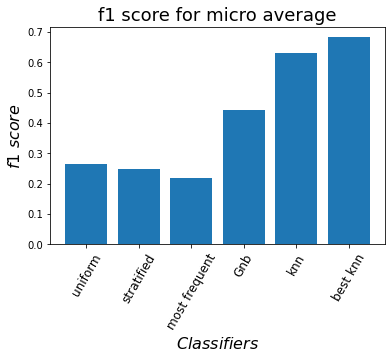

In [54]:
data = {'uniform': micro['uniform'], 'stratified': micro['stratified'], 'most frequent': micro['most_frequent'],'Gnb': micro['gnb'],'knn': micro['knn'],'best knn': micro['best knn']}
names = list(data.keys())
values = list(data.values())


plt.bar(range(len(data)),values,tick_label=names)
plt.savefig('bar.png')
plt.title("f1 score for micro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.xticks(rotation = 60, fontsize = 12)
plt.show()

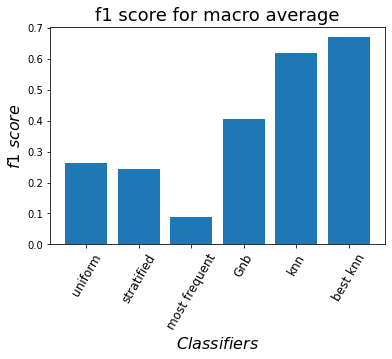

In [55]:
data = {'uniform': macro['uniform'], 'stratified': macro['stratified'], 'most frequent': macro['most_frequent'],'Gnb': macro['gnb'],'knn': macro['knn'],'best knn':macro['best knn']}
names = list(data.keys())
values = list(data.values())


plt.bar(range(len(data)),values,tick_label=names)
plt.savefig('bar.png')
plt.title("f1 score for macro average", fontsize = 18)
plt.xlabel("$Classifiers$", fontsize = 16)
plt.ylabel("$f1\ score$", fontsize = 16)
plt.xticks(rotation = 60, fontsize = 12)
plt.show()

### *4. Τυπώστε πίνακα με τη μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους.*


In [56]:
print("kNN")
f1_progress = [[macro["knn"], micro["knn"]],[macro["best knn"], micro["best knn"]]]
pd.DataFrame(f1_progress, columns=["f1 macro score ", "f1 micro score"], index = ["before", "after"])


kNN


,f1 macro score,f1 micro score
before,0.620659,0.629412
after,0.670451,0.682353


In [57]:
f1_progress_before = [macro["knn"], micro["knn"]]
f1_progress_after=[macro["best knn"], micro["best knn"]]
res = tuple(map(lambda i, j: i - j, f1_progress_after, f1_progress_before)) 
pd.DataFrame(res, index=["f1_progress_macro", "f1_progress_micro"], columns = ["kNN Improvement"])

,kNN Improvement
f1_progress_macro,0.049792
f1_progress_micro,0.052941


### *5. Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης, τη μεταβολή της απόδοσης και τους χρόνους εκτέλεσης.*

Όσο αφορά τα plots παρατηρούμε τη βελτίωση του knn σε σύγκριση με τα προηγούμενα plots και για τα δύο metrics (micro και macro). Οι άλλοι ταξινομητές(dummies) βγάζουν τα ίδια αποτελέσματα όπως είναι αναμενόμενο.
Όσο αφορά τις τιμές precision, recall και f1 των πινάκων σύγχισης παρατηρούμε ότι και αυτές βελτιώνονται. Πιο συγκεκριμένα τώρα έχουμε λιγότερα false negatives και false positives άρα έχουμε καλύτερο precision και recall και για τις δύο κλάσεις. Παρατηρούμε βελτίωση στην απόδοση του knn ταξινομητή της τάξης του 5%. Επίσης βλέπουμε ότι ο χρόνος εκπαίδευσης και πρόβλεψης είναι πολύ μικροί (της τάξης των ms). Αυτό οφείλεται στο ότι τα δεδομένα είναι πολύ λίγα ήδη από το στάδιο της προεπεξεργασίας.
Γενικά τα δύο averaged metrics (micro και macro) βγάζουν πολύ κοντινά αποτελέσματα με πολύ μικρές διαφορές μεταξύ τους, ουσιαστικά ασήμαντες.